# **Desarrollo: "Descubriendo los Secretos del Mercado Inmobiliario"**

# **Importación de librerías**

In [1]:
# Importando librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuraciones para que se vea mejor
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# **1. Carga y Visualización Inicial**
Se carga el archivo como Dataframe ("df") y se realiza la primer inspección con las funciones solicitadas:

In [8]:
# 1.1 Cargando archivo en un DataFrame ("df")
df = pd.read_csv('train.csv')

# 1.2 Usando .shape para la primer inspección
print("En el DataFrame hay el siguiente número de filas y columnas:")
print("(filas, columnas)")
print(df.shape)
print("\n" + "="*50 + "\n") #Separación

# 1.2 Usando head() para la primer inspección
print("Registros del DataFrame (solo los primeros 5):")
print(df.head())
print("\n" + "="*50 + "\n") #Separación

# 1.2 Usando .info() para la primer inspección
print("Información general y tipos de datos por columna:")
df.info()

En el DataFrame hay el siguiente número de filas y columnas:
(filas, columnas)
(1460, 81)


Registros del DataFrame (solo los primeros 5):
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         L

# **2. Limpieza de Datos**
**2.1 Diagnóstico:** Identificando cuántos valores nulos hay por columna:

In [13]:
# 2.1 Obteniendo un reporte completo de los valores faltantes
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum().sort_values(ascending=False))

Cantidad de valores nulos por columna:
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64


**2.2 Tratamiento:** Se tomarán las columnas **"GarageYrBlt"**, **"Alley"** y **"Electrical"** para imputar o eliminar según el caso, de la siguiente forma:

* **Justificación de Limpieza de Datos para "GarageYrBlt":**
Se inmputan los valores faltantes con la mediana, porque la distribución de los años de construcción de garajes puede tener valores atípicos y la mediana es mucho más robusta a estos que la media.



In [ ]:
# 2.2 Tratamiento de datos faltantes GarageYrBlt
# Imputación con la Mediana (para variables numéricas con mucha diferencia entre un valor y otro)
median_garage_yr = df['GarageYrBlt'].median()
df['GarageYrBlt'].fillna(median_garage_yr, inplace=True)

* **Justificación de Limpieza de Datos para la columna "Alley":** Se elimina la columna ya que tiene más del 90% de datos "faltantes", por lo que no aporta información valiosa y podría ser difícil de imputarla correctamente.

In [ ]:
# 2.2 Tratamiento de datos faltantes Alley
# Eliminación de Columna por demasiados datos faltantes (tienen demasiados campos nulos)
# Cabe aclarar que no solo curre con la columna 'Alley' también pasa en columnas como: 'PoolQC', 'Fence', 'MiscFeature' (también son borradas):
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

* **Justificación de Limpieza de Datos para la columna "Electrical":** Se imputa el valor faltante con la moda (el valor más frecuente), puesto que es una variable categórica y solo le hace falta un dato.

In [ ]:
# 2.2 Tratamiento de datos faltantes Electrical
# Imputación con la Moda (para variables categóricas)
mode_electrical = df['Electrical'].mode()[0]
df['Electrical'].fillna(mode_electrical, inplace=True)

*Una vez tratadas las columnas en la limpeza de datos, se verifica que se trataron los valores nulos correctamente de la siguiente manera:*

In [15]:
# Verificación final para confirmar que se trataron los nulos bien
print("Valores nulos restantes en las columnas tratadas:")
print(df[['GarageYrBlt', 'Electrical']].isnull().sum())
print("\nVerificando que las otras columnas fueron eliminadas:")
print('Alley' in df.columns) # Debería imprimir False

Valores nulos restantes en las columnas tratadas:
GarageYrBlt    0
Electrical     0
dtype: int64

Verificando que las otras columnas fueron eliminadas:
False


# **3. Análisis Descriptivo**
Distribuciones y estadísticas principales por variable:

In [17]:
# 3.1 Usando .describe() para resumen
print("Resumen estadístico de las variables numéricas:")
print(df.describe())

Resumen estadístico de las variables numéricas:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.20

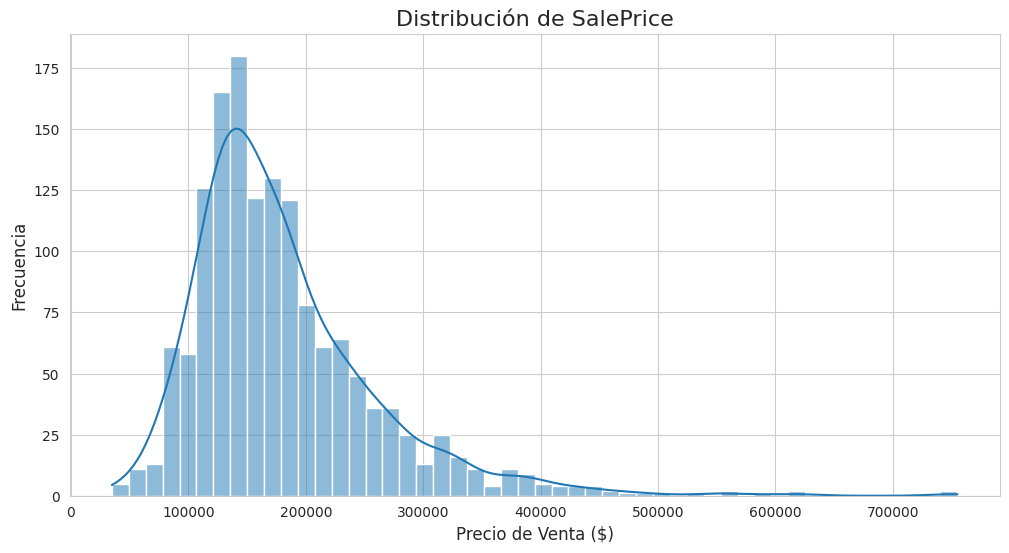

In [18]:
# 3.2 Analizando 'SalePrice' con un histograma
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True, bins=50)
plt.title('Distribución de SalePrice', fontsize=16)
plt.xlabel('Precio de Venta ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

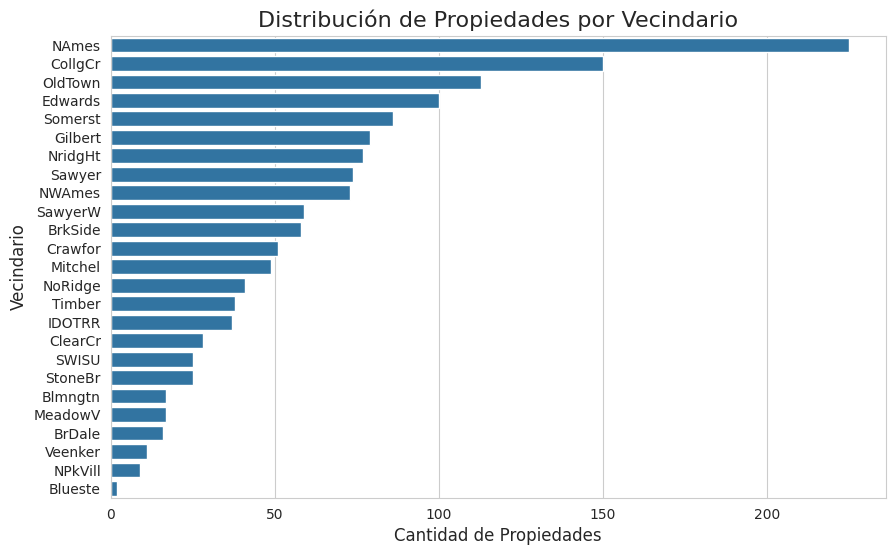

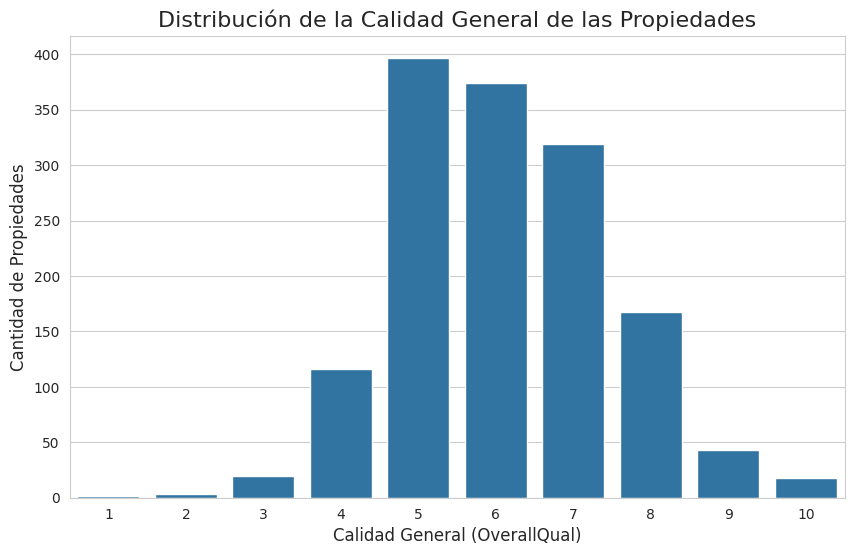

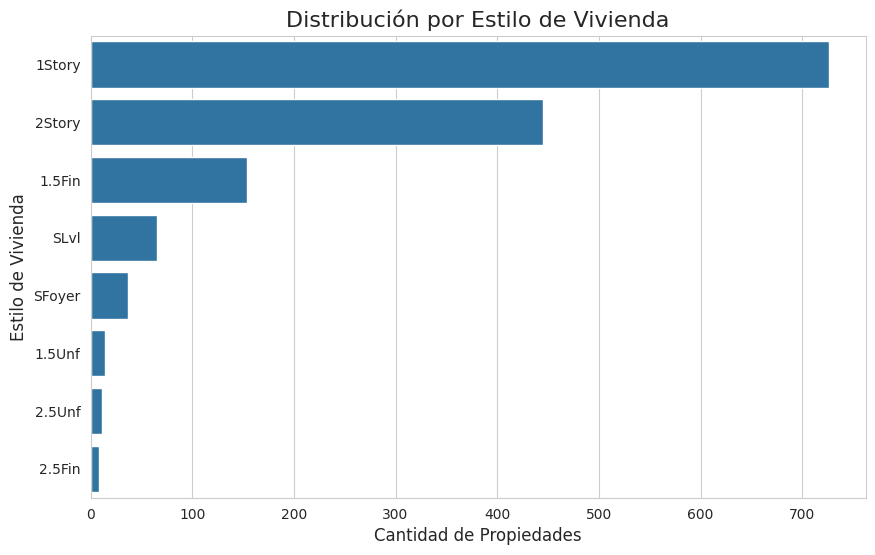

In [21]:
# 3.3 Visualizando la distribución de 3 variables categóricas importantes
# OverallQual, Neighborhood y HouseStyle

# OverallQual
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Neighborhood'], order = df['Neighborhood'].value_counts().index)
plt.title('Distribución de Propiedades por Vecindario', fontsize=16)
plt.xlabel('Cantidad de Propiedades', fontsize=12)
plt.ylabel('Vecindario', fontsize=12)
plt.show()

# Neighborhood
plt.figure(figsize=(10, 6))
sns.countplot(x=df['OverallQual'])
plt.title('Distribución de la Calidad General de las Propiedades', fontsize=16)
plt.xlabel('Calidad General (OverallQual)', fontsize=12)
plt.ylabel('Cantidad de Propiedades', fontsize=12)
plt.show()

# HouseStyle
plt.figure(figsize=(10, 6))
sns.countplot(y=df['HouseStyle'], order = df['HouseStyle'].value_counts().index)
plt.title('Distribución por Estilo de Vivienda', fontsize=16)
plt.xlabel('Cantidad de Propiedades', fontsize=12)
plt.ylabel('Estilo de Vivienda', fontsize=12)
plt.show()

# **4. Análisis Exploratorio**
Relaciones entre las variables

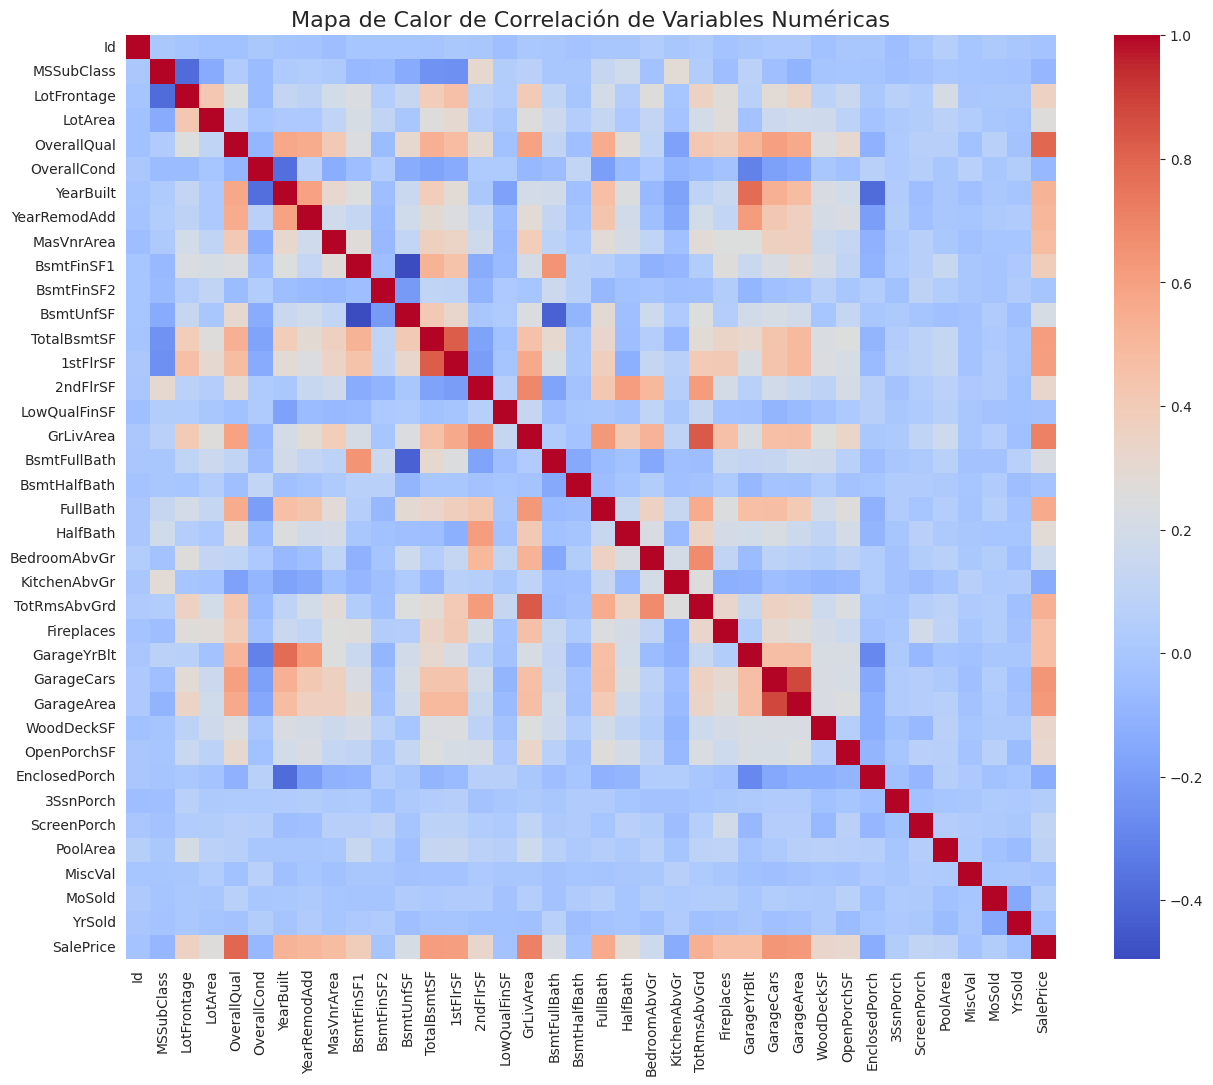

Top 5 variables numéricas más correlacionadas con SalePrice:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64


In [22]:
# 4.1 Calculando matriz de correlación con heatmap
# Seleccionando solo columnas numéricas para calcular bien
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # annot=True si quieres ver los números
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=16)
plt.show()

# Identificando las 5 variables con más correlación a SalePrice usando .abs()
var_num_5 = correlation_matrix['SalePrice'].abs().sort_values(ascending=False).head(6) # head(6) para incluir SalePrice
print("Top 5 variables numéricas más correlacionadas con SalePrice:")
print(var_num_5)

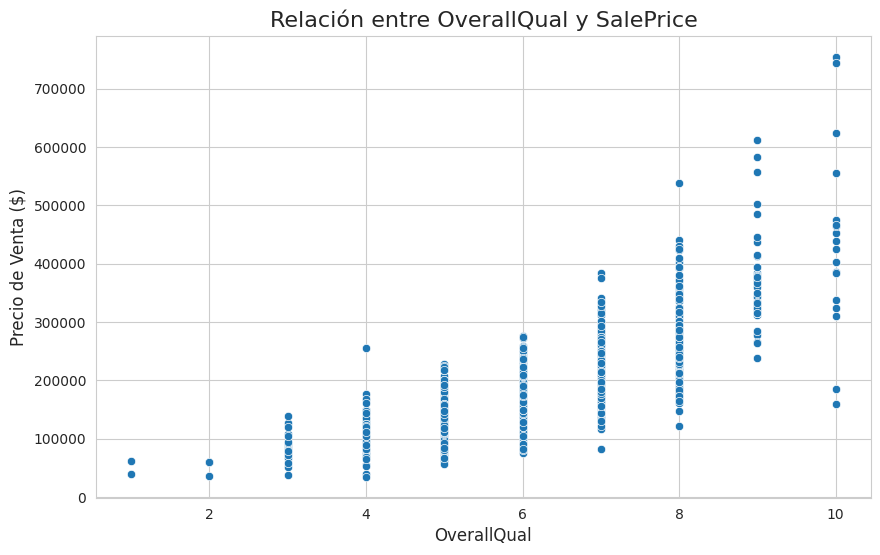

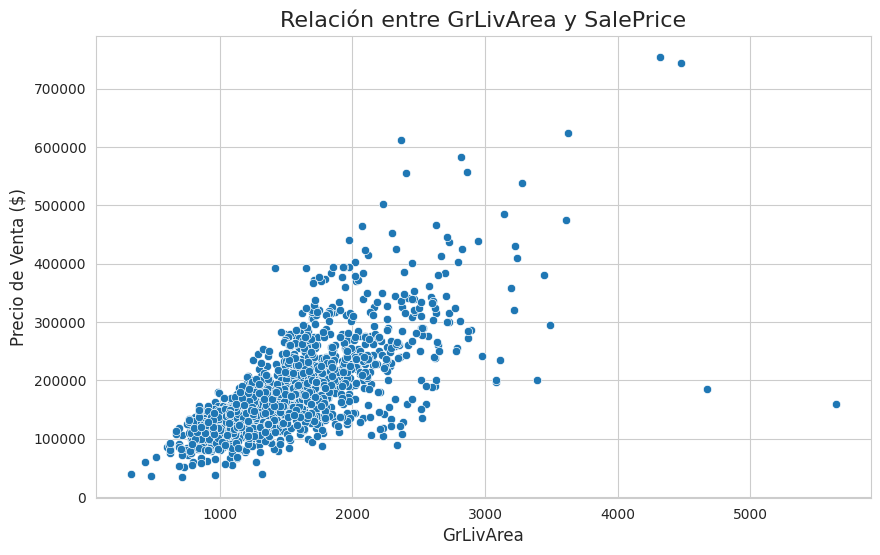

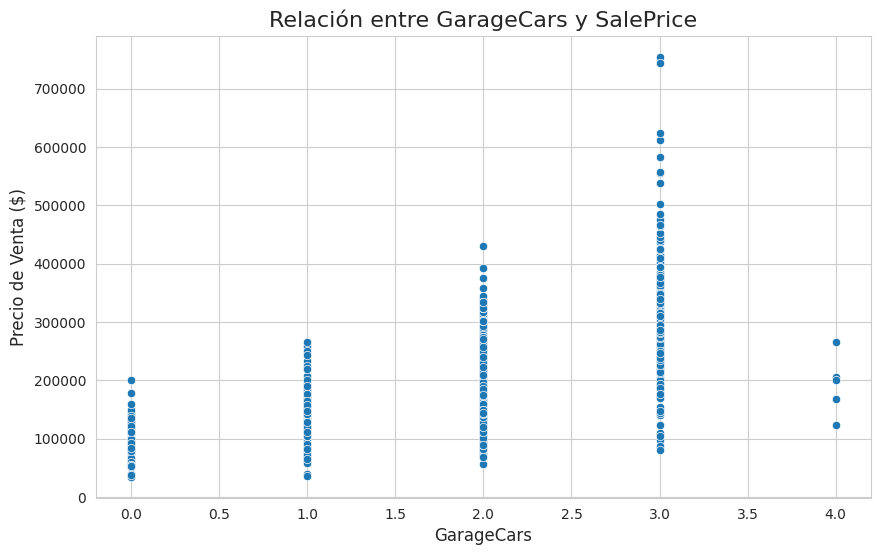

In [23]:
# 4.2 Creando diagramas de dispersión para SalePrice, OverallQual, GrLivArea, GarageCars. Tomamos las 3 siguientes después de SalePrice.
top_3_vars = var_num_5.index[1:4] # Excluimos SalePrice que es la primera

for var in top_3_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(f'Relación entre {var} y SalePrice', fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Precio de Venta ($)', fontsize=12)
    plt.show()

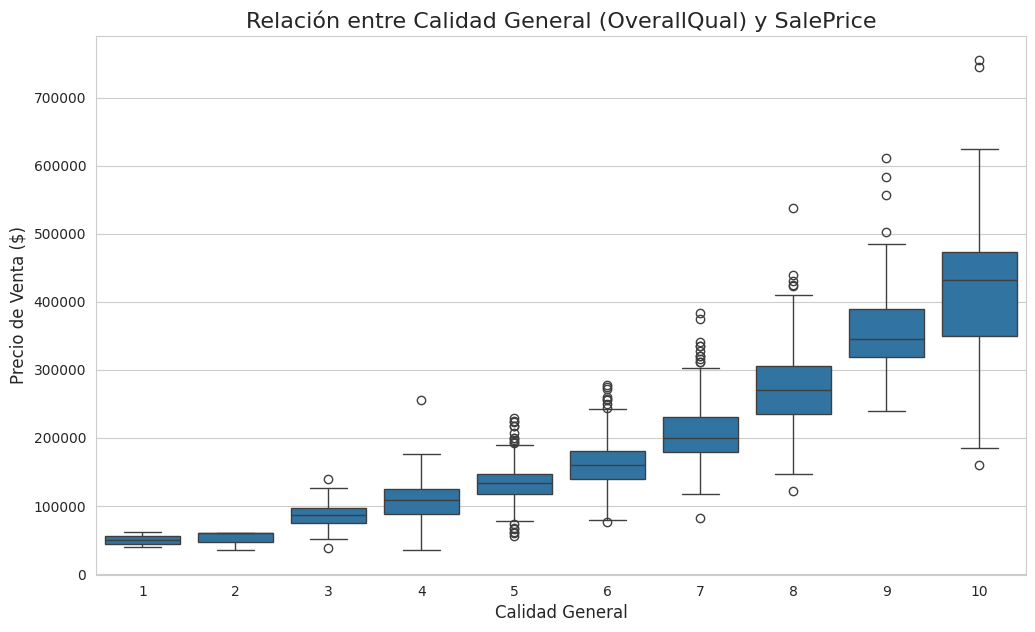

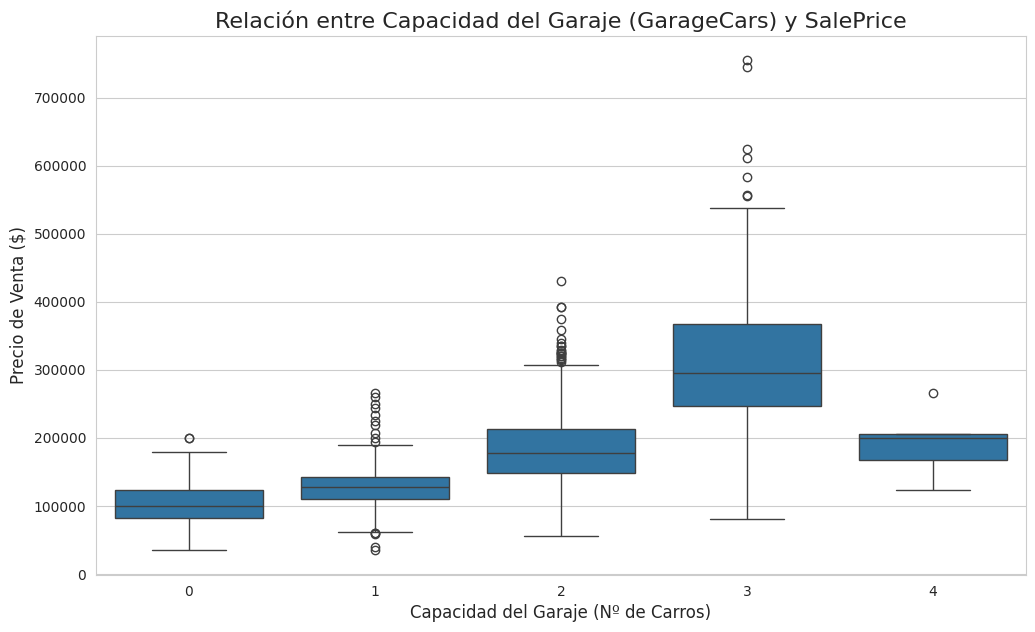

In [24]:
# 4.3 Usando box plots para comparar la relación de SalePrice con OverallQual y GarageCars

# OverallQual
plt.figure(figsize=(12, 7))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Relación entre Calidad General (OverallQual) y SalePrice', fontsize=16)
plt.xlabel('Calidad General', fontsize=12)
plt.ylabel('Precio de Venta ($)', fontsize=12)
plt.show()

# GarageCars
plt.figure(figsize=(12, 7))
sns.boxplot(x='GarageCars', y='SalePrice', data=df)
plt.title('Relación entre Capacidad del Garaje (GarageCars) y SalePrice', fontsize=16)
plt.xlabel('Capacidad del Garaje (Nº de Carros)', fontsize=12)
plt.ylabel('Precio de Venta ($)', fontsize=12)
plt.show()

# **Explicaciones - Justificaciones**


Basado en el análisis de datos realzado, la conclusión final sobre las características que más influyen en el precio de una vivienda se resume de la siguiente manera:

El precio de venta (SalePrice) no depende unica y exclusivamente de un solo factor, sino de la combinación de características de un vivienda. a pesar de esto hay algunas tienen un peso mucho mayor que otras. Podríamos afirmar que las más influyentes pueden agruparse en tres categorías principales:

**1. Calidad y Dimensiones Generales de la Vivienda:**

* OverallQual: El factor individual más influyente; el análisis realizado  demuestra de forma contundente que a medida que aumenta la calificación de la calidad general de la vivienda (como materiales y acabado por ejemplo), el precio se incrementa bastante.

* GrLivArea: Es el segundo factor más importante ya que existe la relación: "a más metros cuadrados de superficie habitable, mayor es el precio". Confirmado en el diagrama scatter plot.

**2. Características del Garaje**

* GarageCars: El número de carros que puede tener un garaje se relaciona directamente con el precio. Una casa con garaje para 2 o 3 carros es significativamente más cara que una con espacio solo para 1 o directamente ninguno.

* GarageArea: Directamente relacionado al factor anterior, el tamaño en metros cuadrados del garaje también influye bastante en el precio final de una casa.

**3. Otros Factores Clave**

* TotalBsmtSF: Si bien no es tan relevante como la superficie habitable, el tamaño del sótano contribuye directamente al valor de la propiedad.

* YearBuilt: Generalmente si la casa fue construida hace poco tiempo (o directamente es nueva) tiende a ser más costosa que una que es más vieja, mostrando una correlación positiva con el precio.

* Neighborhood: Aunque es una variable categórica la ubicación es fundamental. El análisis muestra que ciertos "barrios" tienen precios mucho más altos que otros, reflejando la deseabilidad y los servicios de la zona en su precio de venta.

# **Conclusión Final**

En síntesis, el precio de una vivienda no depende de un único factor, sino de la combinación de varios elementos. Entre ellos destacan la calidad constructiva y la amplitud de los espacios como determinantes principales. Sin embargo, aspectos complementarios como la presencia de un garaje adecuado y la ubicación en un vecindario atractivo refuerzan significativamente el valor percibido del inmueble, convirtiéndose en componentes decisivos al momento de establecer su precio final.